# Chapter 2: Look-Ahead Search in Tic Tac Toe



***
*“Saying Deep Blue doesn't really think about chess is like saying an airplane doesn't really
fly because it doesn't flap its wings.”*

-- Drew McDermott
***



What you'll learn in this chapter:

* Learning the rules of Tic Tac Toe
* Playing Tic Tac Toe in the local game environment
* Creating agents that can think one, two, or three steps ahead
* Testing the effectiveness of AI agents in Tic Tac Toe


In this chapter, you'll learn to play the Tic Tac Toe game in a local game environment. You'll hard code in various rules to make the AI player think up to three
steps ahead. You'll then deploy the strategies against a random player and each other
and see how effective they are. Coding in rule-based AI in Tic Tac Toe
in this chapter serves at least four purposes. First, you'll learn how to
build an AI agent that can think up to three steps ahead and generalize
the logic to other games or real-world situations. Second, it introduces
you to the game environment of Tic Tac Toe, as we'll use this game to
study other AI algorithms later in this book, such as MiniMax, Monte
Carlo Tree Search, Actor-Critic, and so on. Third, in deep reinforcement
learning, an agent learns from playing against intelligent opponents, and
we'll use the AI players created in this chapter as opponents when we
design deep reinforcement learning game strategies. Fourth, later in
this book, we'll use rule-based AI to test how effective a certain game
strategy is; that is, we'll use rule-based AI as our benchmark when
testing the effectiveness of various game strategies.

To build an AI player who can think one step ahead, we iterate through
all possible next moves and check if any one of them leads to winning
the game right away. If yes, the AI player will take the move. Thinking
two steps ahead means that the AI player tries to prevent the opponent
from winning the next turn. The program iterates through all
combinations of the next two moves and checks if there is a combination that
leads to a win for the opponent. If yes, the AI player blocks the
opponent's move. By thinking three steps ahead, the AI player follows
the path that most likely leads to a victory after three moves. In many
scenarios, thinking three steps ahead can guarantee a win for the AI
player in three steps.

# 1. The Tic Tac Toe Game Environment

## 1.1. Methods and Attributes in Tic Tac Toe

First, download the file *coin_env.py* from the book's GitHub repository https://github.com/markhliu/AlphaGoSimplified and  place it in the folder /Desktop/ags/utils/ on your computer. 

## 1.2. Familirize Yourself with the Tic Tac Toe Game Environment

In [1]:
from utils.ttt_env import ttt

env = ttt()
env.reset()                    
env.render()

We import the *ttt* class from the local *ttt_env* module and set it as our game environment. Since we called the *render()* method in the above code cell, you should see a separate turtle window, with a game board as shown below: 
<img src="https://gattonweb.uky.edu/faculty/lium/ml/ttt_start.png" />

The nine cells on the game board are marked 1 through nine. After each move, the corresponding cell will be marked with an X or an O. 

If you want to close the game board window, use the *close()* method, like so:

In [2]:
env.close()

In [3]:
env=ttt()
# check the action space
number_actions=env.action_space.n
print("the number of possible actions is", number_actions)
# sample the action space ten times
print("the following are ten sample actions")
for i in range(10):
   print(env.sample())
# check the shape of the observation space
print("the shape of the observation space is",\
      env.observation_space.shape)

the number of possible actions is 9
the following are ten sample actions
2
7
9
9
6
8
4
2
5
9
the shape of the observation space is (9,)


## 1.3. Play Games in the Tic Tac Toe Environment

In [4]:
import time

# Initiate the game environment
env=ttt()
state=env.reset()   
env.render()
# Play a full game 
while True:
    print(f"the current state is \n{state.reshape(3,3)[::-1]}")    
    action = env.sample()
    time.sleep(1)
    print(f"Player X has chosen action={action}")    
    state, reward, done, info = env.step(action)
    env.render()
    if done:
        print(f"game state is \n{state.reshape(3,3)[::-1]}")
        if reward==1:
            print("Player X has won!") 
        else:
            print("It's a tie!") 
        break
    print(f"the current state is \n{state.reshape(3,3)[::-1]}")    
    action = env.sample()
    time.sleep(1)
    print(f"Player O has chosen action={action}")    
    state, reward, done, info = env.step(action)
    env.render()
    if done:
        print(f"game state is \n{state.reshape(3,3)[::-1]}")
        print("Player O has won!") 
        break  
env.close()    

the current state is 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
Player X has chosen action=2
the current state is 
[[0 0 0]
 [0 0 0]
 [0 1 0]]
Player O has chosen action=1
the current state is 
[[ 0  0  0]
 [ 0  0  0]
 [-1  1  0]]
Player X has chosen action=9
the current state is 
[[ 0  0  1]
 [ 0  0  0]
 [-1  1  0]]
Player O has chosen action=4
the current state is 
[[ 0  0  1]
 [-1  0  0]
 [-1  1  0]]
Player X has chosen action=8
the current state is 
[[ 0  1  1]
 [-1  0  0]
 [-1  1  0]]
Player O has chosen action=7
game state is 
[[-1  1  1]
 [-1  0  0]
 [-1  1  0]]
Player O has won!


In [5]:
state=env.reset() 
env.render()  
print("enter a number between 1 and 9 as your move:")
# Play a full game manually
while True:
    print(f"game state is \n{state.reshape(3,3)[::-1]}")   
    m=int(input(f"Player {env.turn}, what's your move?\n"))
    print(f"Player {env.turn} has chosen action={m}")    
    state, reward, done, info = env.step(m)
    env.render() 
    if done:
        print(f"game state is \n{state.reshape(3,3)[::-1]}")
        if reward!=0:
            print(f"Player {env.turn} has won!") 
        else:
            print("It's a tie!") 
        break 
env.close()

enter a number between 1 and 9 as your move:
game state is 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
Player X, what's your move?
5
Player X has chosen action=5
game state is 
[[0 0 0]
 [0 1 0]
 [0 0 0]]
Player O, what's your move?
1
Player O has chosen action=1
game state is 
[[ 0  0  0]
 [ 0  1  0]
 [-1  0  0]]
Player X, what's your move?
3
Player X has chosen action=3
game state is 
[[ 0  0  0]
 [ 0  1  0]
 [-1  0  1]]
Player O, what's your move?
7
Player O has chosen action=7
game state is 
[[-1  0  0]
 [ 0  1  0]
 [-1  0  1]]
Player X, what's your move?
4
Player X has chosen action=4
game state is 
[[-1  0  0]
 [ 1  1  0]
 [-1  0  1]]
Player O, what's your move?
6
Player O has chosen action=6
game state is 
[[-1  0  0]
 [ 1  1 -1]
 [-1  0  1]]
Player X, what's your move?
2
Player X has chosen action=2
game state is 
[[-1  0  0]
 [ 1  1 -1]
 [-1  1  1]]
Player O, what's your move?
8
Player O has chosen action=8
game state is 
[[-1 -1  0]
 [ 1  1 -1]
 [-1  1  1]]
Player X, what's your move?
9
Pla

# 2. Think One Step Ahead in Tic Tac Toe

## 2.1. Create an AI Player Who Thinks One Step Ahead

In [6]:
from copy import deepcopy

def ttt_think1(env):
    # iterate through all possible next moves
    for m in env.validinputs:
        # make a hypothetical move
        env_copy=deepcopy(env)
        state,reward,done,_=env_copy.step(m) 
        # if reward is 1 or -1, current player wins
        if done and abs(reward)==1:
            # take the winning move
            return m                  
    # otherwise, randomly select a move
    return env.sample()

In [7]:
def ttt_random(env):
    move = env.sample()
    return move

In [8]:
def ttt_manual(env):
    print(f"game state is \n{env.state.reshape(3,3)[::-1]}") 
    while True:
        move = input(f"Player {env.turn}, what's your move?")
        try: 
            move = int(move)
        except:
            print("the move must be a number")
        if move in env.validinputs:
            return move
        else:
            print("please enter a valid move")

In [9]:
# Define the one_ttt_game() function
def one_ttt_game(player1, player2):
    env = ttt()
    env.reset()     
    while True:    
        action = player1(env)  
        state, reward, done, _ = env.step(action)
        if done:
            break
        action = player2(env)  
        state, reward, done, _ = env.step(action)
        if done:
            break            
    return reward      

## 2.2. Test the Think-One-Step-Ahead AI in Tic Tac Toe

In [10]:
from utils.ch02util import one_ttt_game, ttt_think1, ttt_manual

reward=one_ttt_game(ttt_think1, ttt_manual)
print(f"the game outcome is {reward}")

game state is 
[[0 0 0]
 [0 1 0]
 [0 0 0]]
Player O, what's your move?1
game state is 
[[ 0  0  1]
 [ 0  1  0]
 [-1  0  0]]
Player O, what's your move?2
game state is 
[[ 0  0  1]
 [ 0  1  1]
 [-1 -1  0]]
Player O, what's your move?4
the game outcome is 1


In [11]:
from utils.ch02util import ttt_random

results=[]
for i in range(1000):
    # AI moves first if i is an even number
    if i%2==0:
        result=one_ttt_game(ttt_think1,ttt_random)
        # record game outcome
        results.append(result)
    # AI moves second if i is an odd number
    else:
        result=one_ttt_game(ttt_random,ttt_think1)
        # record negative of the game outcome
        results.append(-result)

In [12]:
# count how many times AI player has won
wins=results.count(1)
print(f"the AI player has won {wins} games")
# count how many times AI player has lost
losses=results.count(-1)
print(f"the AI player has lost {losses} games")
# count tie games
ties=results.count(0)
print(f"the game has tied {ties} times")

the AI player has won 653 games
the AI player has lost 272 games
the game has tied 75 times


# 3. Think Two Steps Ahead in Tic Tac Toe


## 3.1. A Tic Tac Toe Agent Who Thinks Two Steps Ahead


In [13]:
def ttt_think2(env):
    # iterate through all possible next moves
    for m in env.validinputs:
        # make a hypothetical move
        env_copy=deepcopy(env)
        state,reward,done,_=env_copy.step(m) 
        # if reward is 1 or -1, current player wins
        if done and abs(reward)==1:
            # take the winning move
            return m  
    # otherwise, look two moves ahead
    for m1 in env.validinputs:
        for m2 in env.validinputs:
            if m1!=m2:
                env_copy=deepcopy(env)
                s,r,done,_=env_copy.step(m1) 
                s,r,done,_=env_copy.step(m2)                     
                # block opponent's winning move
                if done and r!=0:
                    return m2 
    # otherwise, return a random move               
    return env.sample()

## 3.2. Test the Think-Two-Steps-Ahead AI in Tic Tac Toe 

In [14]:
from utils.ch02util import ttt_think2

reward=one_ttt_game(ttt_think2, ttt_manual)
print(f"the game outcome is {reward}")

game state is 
[[0 1 0]
 [0 0 0]
 [0 0 0]]
Player O, what's your move?5
game state is 
[[ 0  1  0]
 [ 0 -1  0]
 [ 1  0  0]]
Player O, what's your move?3
game state is 
[[ 1  1  0]
 [ 0 -1  0]
 [ 1  0 -1]]
Player O, what's your move?2
the game outcome is 1


In [15]:
results=[]
for i in range(1000):
    # think-two-steps-ahead AI moves first at even i
    if i%2==0:
        result=one_ttt_game(ttt_think2, ttt_think1)
        # record game outcome
        results.append(result)
    # think-two-steps-ahead AI moves second at odd i
    else:
        result=one_ttt_game(ttt_think1, ttt_think2)
        # record negative of game outcome
        results.append(-result)

In [16]:
# count how many times think-two-steps-ahead AI won
wins=results.count(1)
print(f"think-two-steps-ahead AI won {wins} games")
# count how many times it lost
losses=results.count(-1)
print(f"think-two-steps-ahead AI lost {losses} games")
# count tie games
ties=results.count(0)
print(f"the game has tied {ties} times")

think-two-steps-ahead AI won 778 games
think-two-steps-ahead AI lost 77 games
the game has tied 145 times


# 4. Think Three Steps Ahead


## 4.1. Think-Three-Steps-Ahead AI in Tic Tac Toe
Consider the example as illustrated in the figure below. It's Player X's turn to move, and if it chooses cell 2 as its next move, it can create a double attack and gurantee a win in three steps: Player X can win by placing a piece in cell 3 or cell 8 in three steps and win the game. Player O can either block cell 3 or cell 8, but not both. 

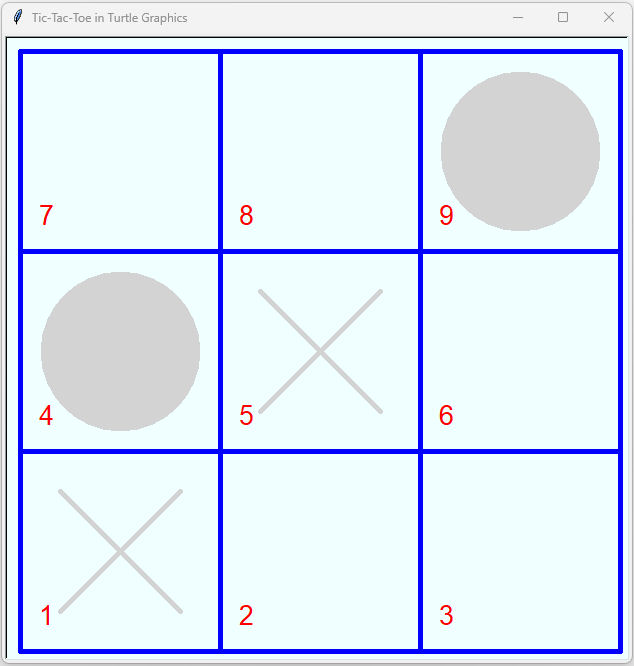 

We define a function *ttt_think3()* in the local module *ch02util*. The function checks if there is a move that wins the game for the AI player right away or if the opponent has a winning move two steps ahead. If not, the funnction looks three steps ahead and chooses the move that most likely leads to a win for the current player.  

Take a look at the function *ttt_think3()* in the file *ch02util.py*. In particular, the following lines of code allows the agent to look three steps ahead:

```Python
def ttt_think3(env):
    ...
    # look three steps ahead
    w3=[]
    for m1 in env.validinputs:
        for m2 in env.validinputs:
            for m3 in env.validinputs:
                if m1!=m2 and m1!=m3 and m2!=m3:
                    env_copy=deepcopy(env)
                    s,r,done,_=env_copy.step(m1) 
                    s,r,done,_=env_copy.step(m2)   
                    s,r,done,_=env_copy.step(m3)                    
                    if done and r!=0:
                        w3.append(m1) 
    # Choose the most frequent winner
    if len(w3)>0:
        return max(w3,key=w3.count)                
    # Return random move otherwise
    return env.sample()
```

## 4.2. Test the Think-Three-Steps-Ahead AI in Tic Tac Toe

In [17]:
from utils.ch02util import ttt_think3

reward=one_ttt_game(ttt_think3, ttt_manual)
print(f"the game outcome is {reward}")

game state is 
[[0 0 0]
 [0 1 0]
 [0 0 0]]
Player O, what's your move?4
game state is 
[[ 0  0  0]
 [-1  1  0]
 [ 1  0  0]]
Player O, what's your move?9
game state is 
[[ 0  0 -1]
 [-1  1  0]
 [ 1  1  0]]
Player O, what's your move?3
the game outcome is 1


In [18]:
results=[]
for i in range(1000):
    # think-three-steps-ahead AI moves first at even i
    if i%2==0:
        result=one_ttt_game(ttt_think3, ttt_think2)
        # record game outcome
        results.append(result)
    # think-three-steps-ahead AI moves second otherwise
    else:
        result=one_ttt_game(ttt_think2, ttt_think3)
        # record negative game outcome
        results.append(-result)

In [19]:
# count how many times think-three-steps-ahead AI won
wins=results.count(1)
print(f"think-three-steps-ahead AI won {wins} games")
# count how many times it lost
losses=results.count(-1)
print(f"think-three-steps-ahead AI lost {losses} games")
# count tie games
ties=results.count(0)
print(f"the game has tied {ties} times")

think-three-steps-ahead AI won 270 games
think-three-steps-ahead AI lost 179 games
the game has tied 551 times
